Linear Support Vector Machine (SVM)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('//content/drive/MyDrive/pharmacy (1).csv')

In [ ]:

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:

categorical_feature_columns = list(set(data.columns) - set(data._get_numeric_data().columns))
categorical_feature_columns

['Cholesterol', 'Sex', 'BP', 'Drug']

In [ ]:
numerical_feature_columns = list(data._get_numeric_data().columns)
numerical_feature_columns

['Age', 'Na_to_K']

In [ ]:
# Converting categorical variables to dummy variables (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)


In [ ]:
# Spliting the data into features and target variable
X = data_encoded.drop('Drug', axis=1)
y = data_encoded['Drug']


<ipython-input-31-d71744c8919b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Drug', data=data, palette='Set2')


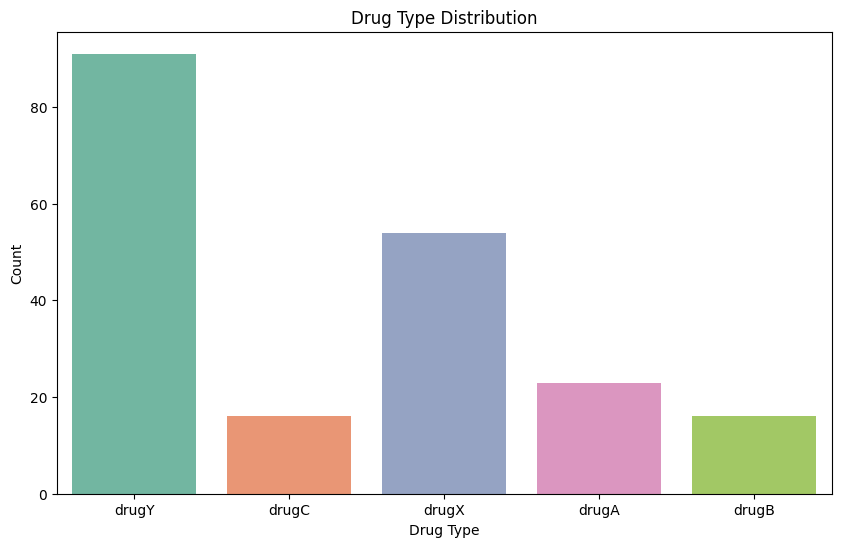

In [ ]:
# Ploting Drug Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Drug', data=data, palette='Set2')
plt.title('Drug Type Distribution')
plt.xlabel('Drug Type')
plt.ylabel('Count')
plt.show()

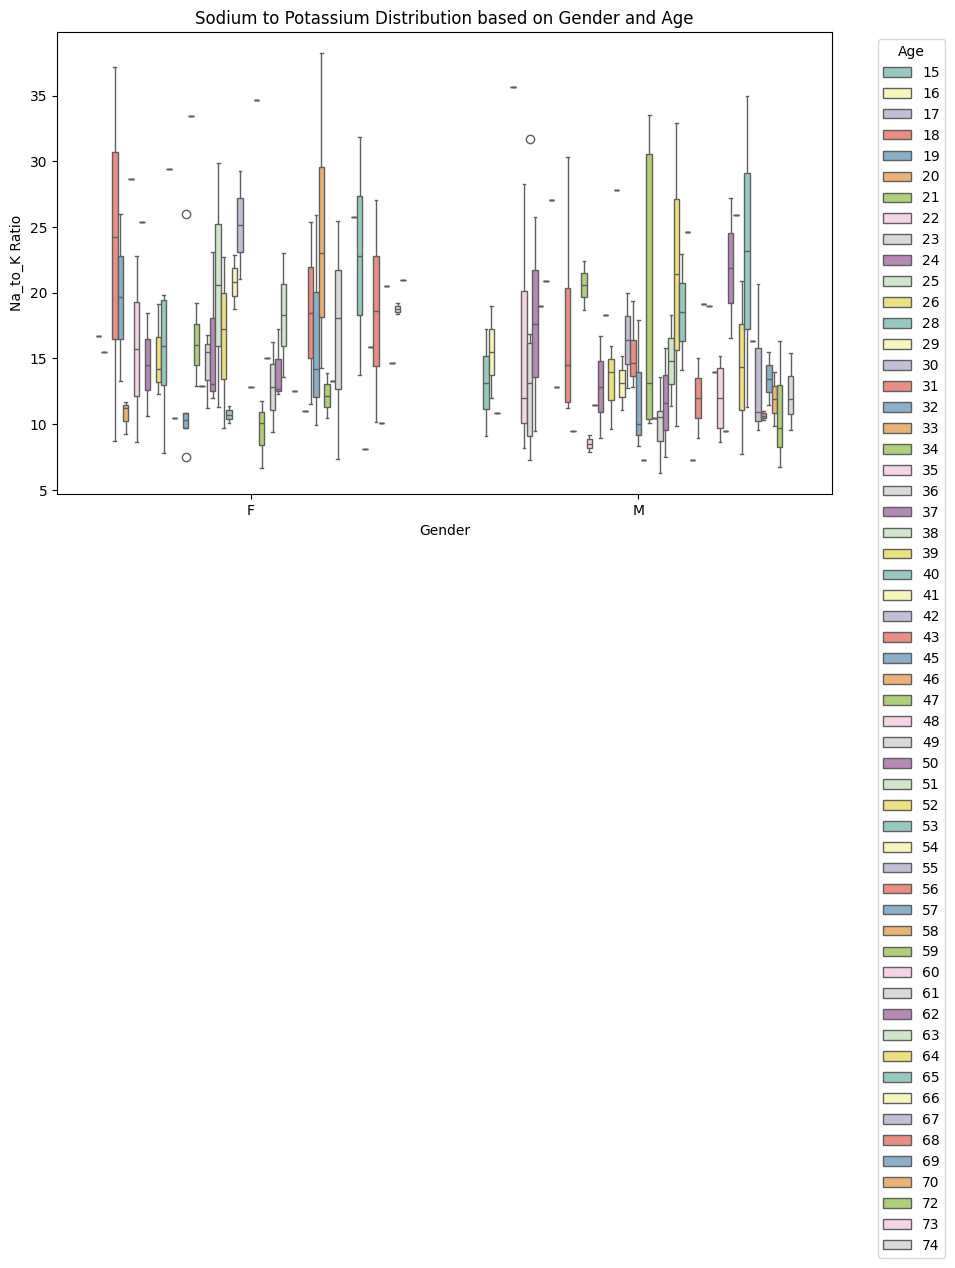

In [ ]:

# Ploting Sodium to Potassium Distribution based on Gender and Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Na_to_K', hue='Age', data=data, palette='Set3')
plt.title('Sodium to Potassium Distribution based on Gender and Age')
plt.xlabel('Gender')
plt.ylabel('Na_to_K Ratio')
plt.legend(title='Age', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initializing and train the Linear SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:

y_pred = model.predict(X_test_scaled)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  2  0  0 24]]


In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       0.60      1.00      0.75         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      0.92      0.96        26

    accuracy                           0.97        60
   macro avg       0.92      0.98      0.94        60
weighted avg       0.98      0.97      0.97        60



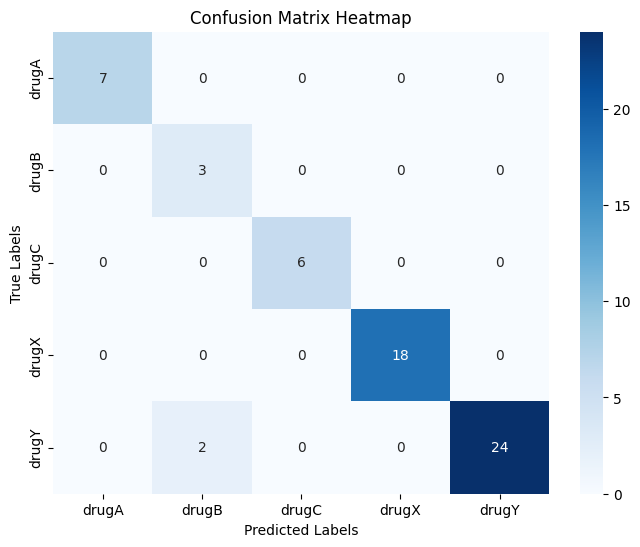

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

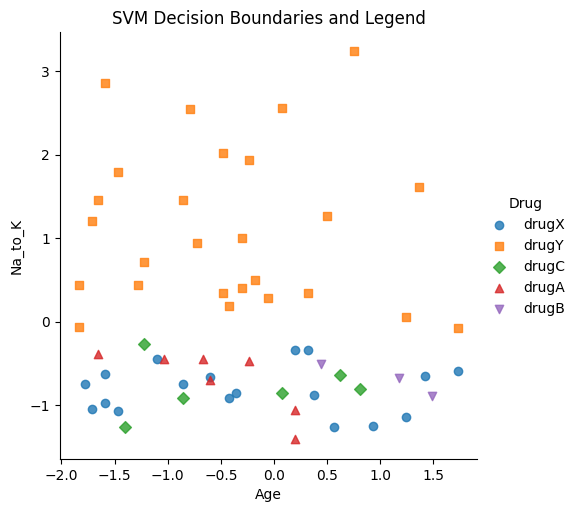

In [ ]:

X_vis = data_encoded[['Age', 'Na_to_K']]
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)


X_vis_train_scaled = scaler.fit_transform(X_vis_train)
X_vis_test_scaled = scaler.transform(X_vis_test)


model_vis = SVC(kernel='linear', random_state=42)
model_vis.fit(X_vis_train_scaled, y_vis_train)


vis_df = pd.DataFrame(X_vis_test_scaled, columns=['Age', 'Na_to_K'])
vis_df['Drug'] = y_vis_test.values

# Pair plot
sns.lmplot(x='Age', y='Na_to_K', data=vis_df, hue='Drug', fit_reg=False, legend=True, markers=["o", "s", "D", "^", "v"])
plt.title('SVM Decision Boundaries and Legend')
plt.show()
